# Imports



In [ ]:
pip install columnar #package to print table of data 

In [ ]:
from collections import defaultdict
import sys
import math
import time
import heapq
import gc
import zipfile
from time import perf_counter_ns
import os
import matplotlib.pyplot as plt
from columnar import columnar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/mst_dataset.zip', 'r') as zip_ref:

     zip_ref.extractall('/content/')

# Classes and handy functions

In this section we define some useful classes and functions for our algorithm implementations.

In [ ]:
class Graph():
  def __init__ (self):
    self.V=[]
    self.E=[]
    self.adjacency_list = defaultdict(list)

  def add_vertex(self,v):
    self.V.append(v)

  def remove_vertex (self,v):
    self.V.remove(v)

  def add_edge(self, source_node, destination_node, weight):
    # First case
    # We add the source and the destination node only if the are not already present
    if (source_node not in self.V):
      self.V.append(source_node)
    
    if (destination_node not in self.V):
      self.V.append(destination_node)
    
    # Now we can add the edge
    edge = (source_node, destination_node, weight)
    self.E.append(edge)

    # Now we update the graph
    self.adjacency_list[source_node].append((destination_node,weight))
    if (source_node != destination_node):
      self.adjacency_list[destination_node].append((source_node,weight))

  def sort_edges(self):
    self.E.sort(key=lambda x:x[2])
    
  def remove_edge(self,source_node, destination_node,weight):
    edge = (source_node, destination_node, weight)
    self.E.remove(edge)
    self.graph[source_node].remove((destination_node,weight))

  def get_edges(self):
    return self.E
  
  def get_value(self,key):
    return self.adjacency_list[key]

  def print_data(self):
    print(self.adjacency_list.items())
  

The class DisjointSet is our data structure that contains the union and find methods, which we'll use in Kruskal's algorithm.

In [ ]:
class DisjointSet:
    def __init__(self, size):
      self.parent = [math.inf]
      self.rank = [0]
      for node in range(size):
        self.parent.append(node+1)
        self.rank.append(1)

    # starting from destination_node's position, it traverses parent edges until reaching a position
    # such that parent(destination_node) = destination_node 
    def find(self, destination_node): 
      if self.parent[destination_node] == destination_node:
        return destination_node
      return self.find(self.parent[destination_node])

    # unites two sets by setting new roots to source_node and destination_node
    def union(self, source_node, destination_node):
      u_root = self.find(source_node)
      v_root = self.find(destination_node)

      # Do nothing
      if (u_root == v_root):
        return 

      if self.rank[u_root] < self.rank[v_root]:
        self.parent[u_root] = v_root
        self.rank[v_root] += self.rank[u_root]
      elif self.rank[u_root] > self.rank[v_root]:
        self.parent[v_root] = u_root
        self.rank[u_root]+=self.rank[v_root]
      else:
        self.parent[v_root] = u_root
        self.rank[u_root] += 1

The following is Kruskal's algorithm with union find. It takes the graph G as input and uses Union Find to keep track of connected components of the mst structure (which will contain our minimum spanning tree).

In [ ]:
def KruskalUnionFind(G):
  mst = []
  U = DisjointSet(len(G.V))
  G.sort_edges()
  for edge in G.E:
    src = edge[0]
    dest = edge[1]
    weight = edge[2]
    # checks the two vertices are in two different connected components so to avoid cycles
    if (U.find(src) != U.find(dest)): 
      mst.append((src,dest,weight)) # if so, we add them into our mst
      U.union(src,dest) # we update the union find data structure
  return mst


In [ ]:
def read_input_data(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  num_verteces = []
  num_edges = []
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(" ")
    num_verteces.append(int(text_splitted[0]))
    num_edges.append(int(text_splitted[1]))
  return num_verteces,num_edges

In [ ]:
def read_input_graph(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(" ")
    if (index==0):
      graph = Graph()
      size = text_splitted[0]
    else:
      graph.add_edge(int(text_splitted[0]),int(text_splitted[1]),int(text_splitted[2]))
  f.close()
  return graph,int(size)

In [ ]:
def read_input_times(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  sizes = []
  times = []
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(" ")
    sizes.append(int(text_splitted[0]))
    times.append(int(text_splitted[1]))
  return times,sizes

In [ ]:
def measure_run_time(num_iterations,input_directory,mst_weights):
  sum_times = 0.0
  sizes = []
  avg_run_times = []
  for file in sorted(os.listdir(input_directory)):
    print("------------------------------------------------------------------------")
    file_path = f"{input_directory}/{file}"
    graph,size = read_input_graph(file_path)
    print(f"Reading file {file}")
    gc.disable()
    for i in range(num_iterations):
      start_time = perf_counter_ns()
      mst = KruskalUnionFind(graph)
      end_time = perf_counter_ns()
      sum_times += (end_time-start_time)
    weight = sum(x[2] for x in mst)
    mst_weights.append(weight)
    sizes.append(size)
    gc.enable()
    time = ((end_time - start_time)/num_iterations)
    avg_run_times.append(time)
    print(f"Total weight of minimum spanning tree using Naive Kruskal Algorithm is: {weight}, in {time}")

  # return running time in nanoseconds
  return avg_run_times,sizes

# Measuring the algorithm's complexity

In [ ]:
num_iterations = 1000
mst_weights = []
run_times,sizes = measure_run_time(num_iterations,'/content/mst_dataset',mst_weights)

------------------------------------------------------------------------
Reading file input_random_01_10.txt
Total weight of minimum spanning tree using Naive Kruskal Algorithm is: 29316, in 36.745
------------------------------------------------------------------------
Reading file input_random_02_10.txt
Total weight of minimum spanning tree using Naive Kruskal Algorithm is: 16940, in 31.852
------------------------------------------------------------------------
Reading file input_random_03_10.txt
Total weight of minimum spanning tree using Naive Kruskal Algorithm is: -44448, in 26.823
------------------------------------------------------------------------
Reading file input_random_04_10.txt
Total weight of minimum spanning tree using Naive Kruskal Algorithm is: 25217, in 22.196
------------------------------------------------------------------------
Reading file input_random_05_20.txt
Total weight of minimum spanning tree using Naive Kruskal Algorithm is: -32021, in 53.143
--------

In [ ]:
tuples = []
for size,runtime in zip(sizes,run_times):
  tuples.append((size,runtime)) # here we store the sorted sizes and the respective running times
tuples.sort(key=lambda y:y[0])
tuples

[(10, 36.745),
 (10, 31.852),
 (10, 26.823),
 (10, 22.196),
 (20, 53.143),
 (20, 47.957),
 (20, 53.363),
 (20, 54.791),
 (40, 128.459),
 (40, 104.008),
 (40, 204.847),
 (40, 106.221),
 (80, 236.317),
 (80, 236.14),
 (80, 217.308),
 (80, 237.772),
 (100, 286.095),
 (100, 289.976),
 (100, 293.442),
 (100, 275.533),
 (200, 563.795),
 (200, 1184.213),
 (200, 598.863),
 (200, 577.582),
 (400, 1214.024),
 (400, 1185.234),
 (400, 1207.689),
 (400, 1146.573),
 (800, 2399.502),
 (800, 2647.814),
 (800, 2390.698),
 (800, 2441.137),
 (1000, 2907.879),
 (1000, 2970.206),
 (1000, 3004.845),
 (1000, 3064.399),
 (2000, 6623.715),
 (2000, 7671.003),
 (2000, 6290.513),
 (2000, 6406.52),
 (4000, 13275.385),
 (4000, 13245.749),
 (4000, 13066.505),
 (4000, 12673.954),
 (8000, 30627.415),
 (8000, 32150.786),
 (8000, 28919.035),
 (8000, 28462.084),
 (10000, 39904.374),
 (10000, 40326.317),
 (10000, 39238.08),
 (10000, 41106.496),
 (20000, 87122.538),
 (20000, 85601.213),
 (20000, 83619.183),
 (20000, 94809.

In [ ]:
print("Size\tTime(ns)")
print(20*"-")
for i in range(len(sizes)):
  print(tuples[i][0], tuples[i][1], sep="\t")
print(20*"-")

Size	Time(ns)
--------------------
10	36.745
10	31.852
10	26.823
10	22.196
20	53.143
20	47.957
20	53.363
20	54.791
40	128.459
40	104.008
40	204.847
40	106.221
80	236.317
80	236.14
80	217.308
80	237.772
100	286.095
100	289.976
100	293.442
100	275.533
200	563.795
200	1184.213
200	598.863
200	577.582
400	1214.024
400	1185.234
400	1207.689
400	1146.573
800	2399.502
800	2647.814
800	2390.698
800	2441.137
1000	2907.879
1000	2970.206
1000	3004.845
1000	3064.399
2000	6623.715
2000	7671.003
2000	6290.513
2000	6406.52
4000	13275.385
4000	13245.749
4000	13066.505
4000	12673.954
8000	30627.415
8000	32150.786
8000	28919.035
8000	28462.084
10000	39904.374
10000	40326.317
10000	39238.08
10000	41106.496
20000	87122.538
20000	85601.213
20000	83619.183
20000	94809.19
40000	186253.374
40000	189046.857
40000	185409.399
40000	185642.761
80000	410152.122
80000	437302.342
80000	415764.135
80000	436760.316
100000	528077.806
100000	568040.306
100000	540131.605
100000	567273.582
--------------------


In [ ]:
num_vertices, num_edges = read_input_data("/content/vertices-edges.txt")
print(num_vertices)
print(num_edges)

[10, 10, 10, 10, 20, 20, 20, 20, 40, 40, 40, 40, 80, 80, 80, 80, 100, 100, 100, 100, 200, 200, 200, 200, 400, 400, 400, 400, 800, 800, 800, 800, 1000, 1000, 1000, 1000, 2000, 2000, 2000, 2000, 4000, 4000, 4000, 4000, 8000, 8000, 8000, 8000, 10000, 10000, 10000, 10000, 20000, 20000, 20000, 20000, 40000, 40000, 40000, 40000, 80000, 80000, 80000, 80000, 100000, 100000, 100000, 100000]
[9, 11, 13, 10, 24, 24, 28, 26, 56, 50, 50, 52, 108, 99, 104, 114, 136, 129, 137, 132, 267, 269, 269, 267, 540, 518, 538, 526, 1063, 1058, 1076, 1049, 1300, 1313, 1328, 1344, 2699, 2654, 2652, 2677, 5360, 5315, 5340, 5368, 10705, 10670, 10662, 10757, 13301, 13340, 13287, 13311, 26667, 26826, 26673, 26670, 53415, 53446, 53242, 53319, 106914, 106633, 106586, 106554, 133395, 133214, 133524, 133463]


In [ ]:
sorted_sizes = list(zip(*tuples))[0]
sorted_runtimes = list(zip(*tuples))[1]
ratios = [None] + [round(tuples[i+1][1]/tuples[i][1],3) for i in range(len(sizes)-1)]
c_estimates = [round(run_time/(m*math.log(n)),3) for run_time,m,n in zip(sorted_runtimes,num_edges,sorted_sizes)]
headers = ["Size","Time","Constant","Ratio"]
data=[]
for i in range(len(sizes)):
  data.append([tuples[i][0], tuples[i][1], c_estimates[i], ratios[i]]) 
table = columnar(data,headers, no_borders= True)
print(table)

          
  SIZE    TIME        CONSTANT  RATIO  
    
  10      36.745      1.773     None   
  10      31.852      1.258     0.867  
  10      26.823      0.896     0.842  
  10      22.196      0.964     0.827  
  20      53.143      0.739     2.394  
  20      47.957      0.667     0.902  
  20      53.363      0.636     1.113  
  20      54.791      0.703     1.027  
  40      128.459     0.622     2.345  
  40      104.008     0.564     0.81   
  40      204.847     1.111     1.97   
  40      106.221     0.554     0.519  
  80      236.317     0.499     2.225  
  80      236.14      0.544     0.999  
  80      217.308     0.477     0.92   
  80      237.772     0.476     1.094  
  100     286.095     0.457     1.203  
  100     289.976     0.488     1.014  
  100     293.442     0.465     1.012  
  100     275.533     0.453     0.939  
  200     563.795     0.399     2.046  
  200     1184.213    0.831     2.1    
  200     598.863     0.42      0.506  
  200     577.582     0.

To plot the complexity of our algorithm, we take the average of c_estimates

In [ ]:
c = sum(c_estimates)/len(c_estimates)
c 

0.4582941176470591

In the following plots, we compare our algorithm complexity with O(mlog(n)) in linear and in logarithmic scale.

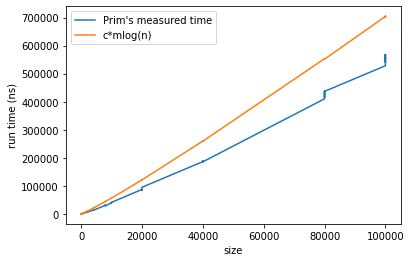

In [ ]:
reference = [c*m*math.log(n) for n,m in zip(sorted_sizes,num_edges)]
plt.plot(sorted_sizes, sorted_runtimes)
plt.plot(sorted_sizes, reference)
plt.legend(["Prim's measured time", "c*mlog(n)"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()

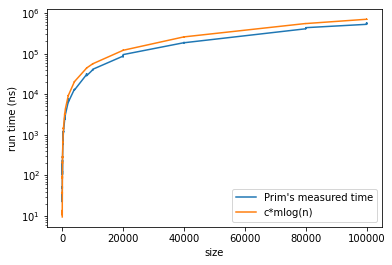

In [ ]:
plt.plot(sorted_sizes, sorted_runtimes)
plt.yscale("log")
plt.plot(sorted_sizes, reference)
plt.legend(["Prim's measured time", "c*mlog(n)"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()